6351071049_Lab2_Bài 5(26-27)

In [ ]:
print("Trần Khôi Nguyên_6351071049 - Câu a: Đọc dữ liệu + tiền xử lý + đổi tên cột")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Trần Khôi Nguyên_6351071049 - Câu a: Đọc dữ liệu + tiền xử lý + đổi tên cột


In [ ]:
# UPLOAD FILE
from google.colab import files
uploaded = files.upload()


Saving heart.csv to heart (1).csv


In [ ]:
# ĐỌC FILE (tùy tên file bạn chọn)
data = pd.read_csv(list(uploaded.keys())[0])

print("Dữ liệu ban đầu:", data.shape)


Dữ liệu ban đầu: (303, 14)


In [ ]:
# THAY THẾ '?' bằng NaN và xóa dòng trống
data.replace("?", np.nan, inplace=True)
data.dropna(inplace=True)

# Đổi tên cột theo yêu cầu đề bài
data.columns = [
    'age', 'sex', 'chest_pain_type',
    'resting_blood_pressure', 'cholesterol',
    'fasting_blood_sugar', 'rest_ecg',
    'max_heart_rate_achieved', 'exercise_induced_angina',
    'st_depression', 'st_slope',
    'num_major_vessels', 'thalassemia',
    'target'
]

print("Dữ liệu sau tiền xử lý:", data.shape)
data.head()


Dữ liệu sau tiền xử lý: (303, 14)


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Trần Khôi Nguyên_6351071049 - Câu 3: Heatmap tương quan Pearson


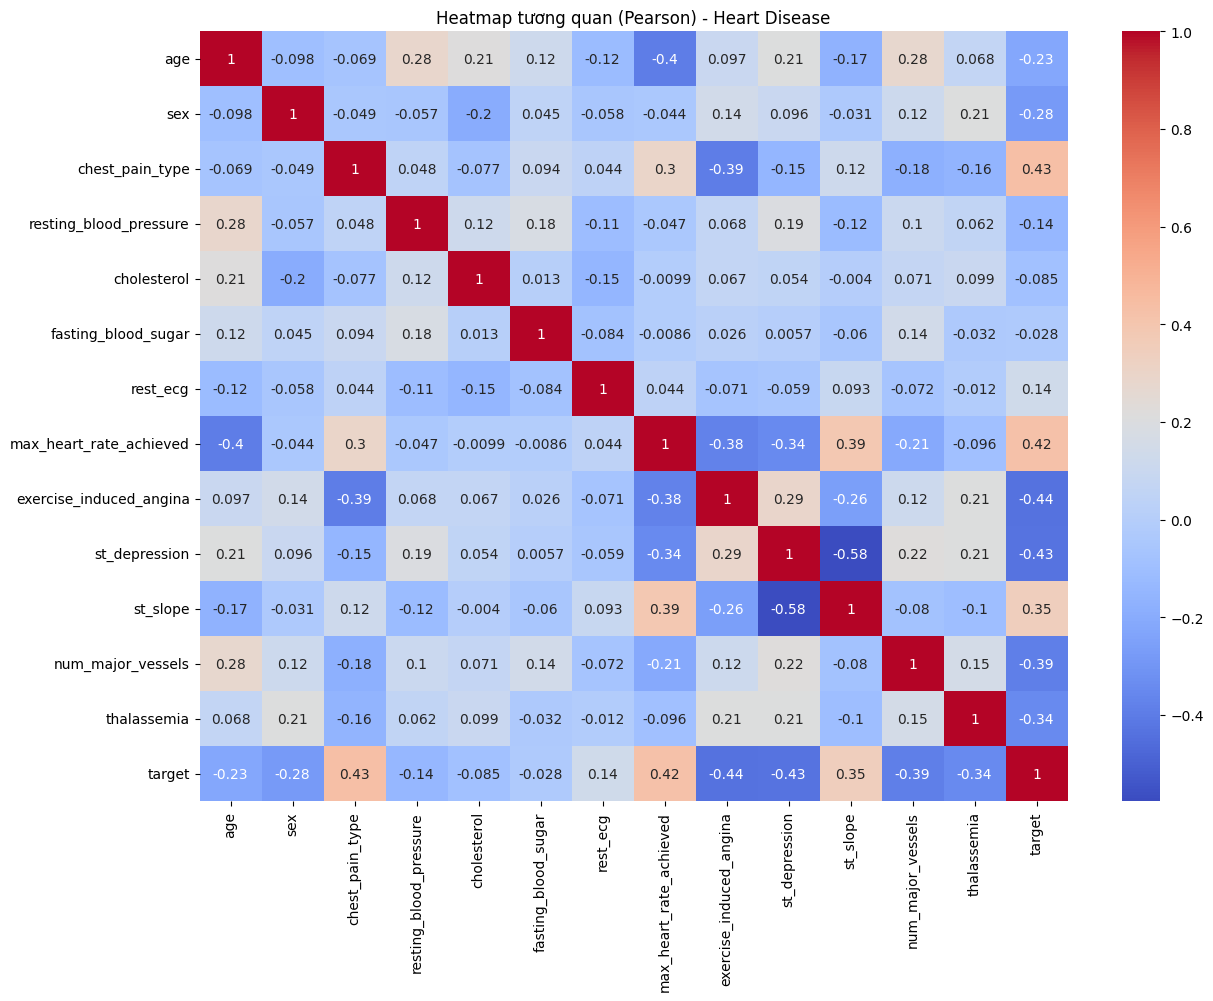

Không có thuộc tính nào tương quan quá cao → không cần loại bỏ.


In [ ]:
print("Trần Khôi Nguyên_6351071049 - Câu 3: Heatmap tương quan Pearson")

corr = data.corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Heatmap tương quan (Pearson) - Heart Disease")
plt.show()

print("Không có thuộc tính nào tương quan quá cao → không cần loại bỏ.")


In [ ]:
print("Trần Khôi Nguyên_6351071049 - Câu 4: Tách features và labels")

X = data.drop(columns=["target"])
y = data["target"]

print("Features:", X.shape)
print("Labels:", y.shape)


Trần Khôi Nguyên_6351071049 - Câu 4: Tách features và labels
Features: (303, 13)
Labels: (303,)


In [ ]:
print("Trần Khôi Nguyên_6351071049 - Câu 5: Chuẩn hóa dữ liệu")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Dữ liệu sau chuẩn hóa:", X_scaled.shape)


Trần Khôi Nguyên_6351071049 - Câu 5: Chuẩn hóa dữ liệu
Dữ liệu sau chuẩn hóa: (303, 13)


In [ ]:
print("Trần Khôi Nguyên_6351071049 - Câu 6: Chia dữ liệu train/test")

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

print("Train:", X_train.shape, y_train.shape)
print("Test :", X_test.shape,  y_test.shape)


Trần Khôi Nguyên_6351071049 - Câu 6: Chia dữ liệu train/test
Train: (212, 13) (212,)
Test : (91, 13) (91,)


Trần Khôi Nguyên_6351071049 - Câu 7: Mô hình ID3 (entropy)
Accuracy ID3: 0.7032967032967034
              precision    recall  f1-score   support

           0       0.66      0.71      0.68        41
           1       0.74      0.70      0.72        50

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91



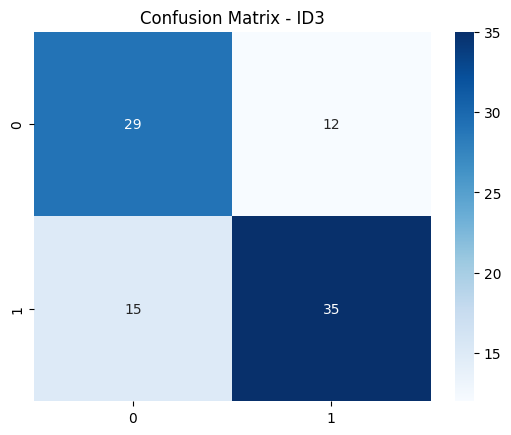

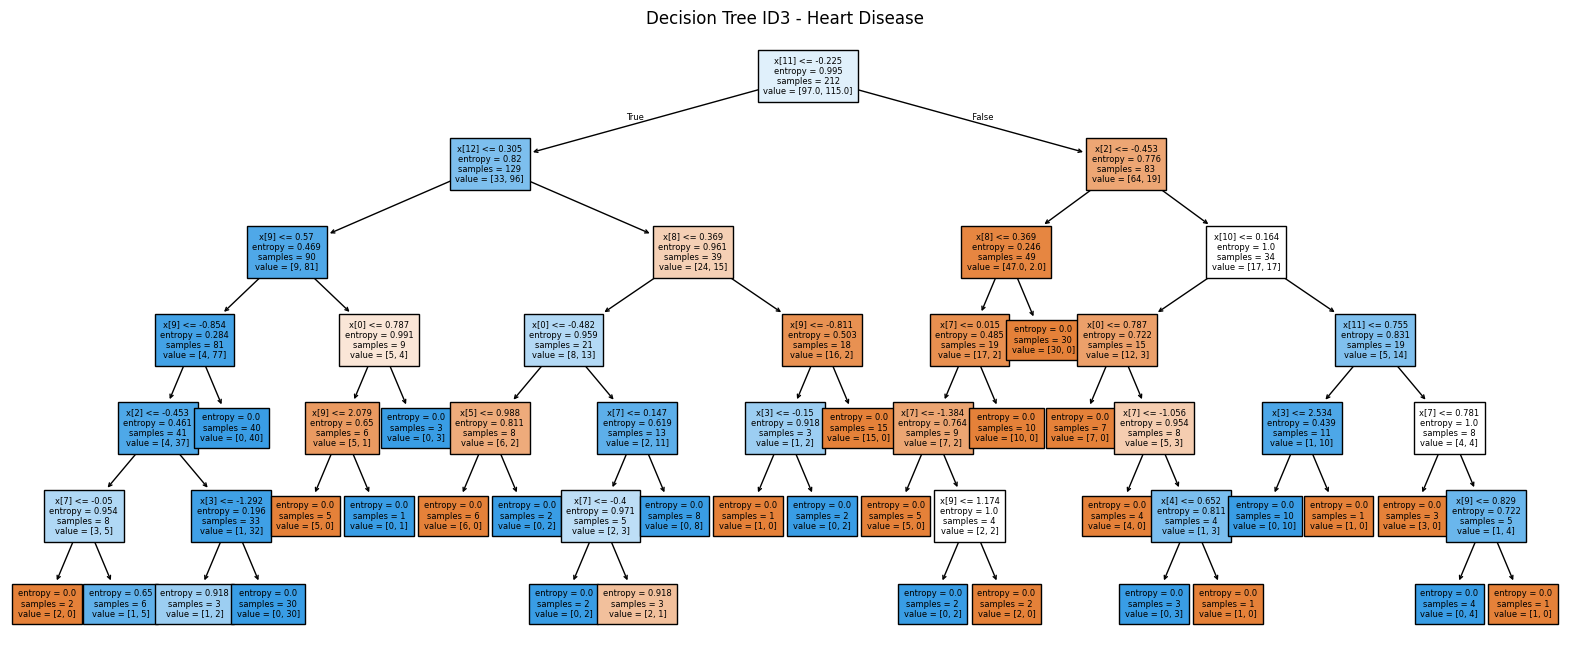

In [ ]:
print("Trần Khôi Nguyên_6351071049 - Câu 7: Mô hình ID3 (entropy)")

id3 = DecisionTreeClassifier(criterion="entropy", max_depth=6)
id3.fit(X_train, y_train)

y_pred_id3 = id3.predict(X_test)

print("Accuracy ID3:", accuracy_score(y_test, y_pred_id3))
print(classification_report(y_test, y_pred_id3))

cm = confusion_matrix(y_test, y_pred_id3)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix - ID3")
plt.show()

plt.figure(figsize=(20,8))
plot_tree(id3, filled=True, fontsize=6)
plt.title("Decision Tree ID3 - Heart Disease")
plt.show()


Trần Khôi Nguyên_6351071049 - Câu 8: Mô hình CART (gini)
Accuracy CART: 0.7362637362637363
              precision    recall  f1-score   support

           0       0.68      0.78      0.73        41
           1       0.80      0.70      0.74        50

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.74      0.74      0.74        91



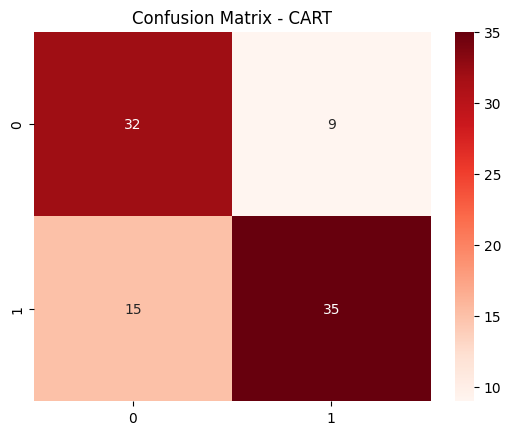

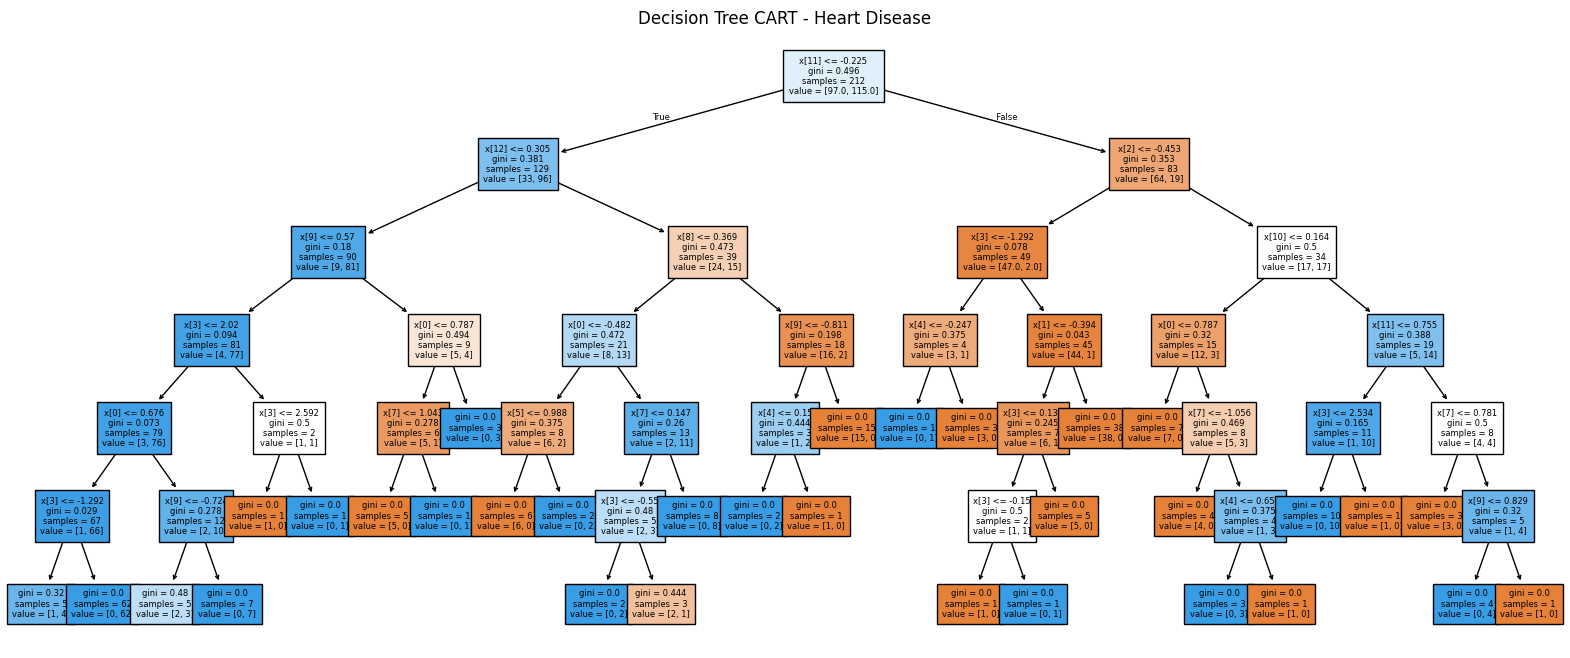

In [ ]:
print("Trần Khôi Nguyên_6351071049 - Câu 8: Mô hình CART (gini)")

cart = DecisionTreeClassifier(criterion="gini", max_depth=6)
cart.fit(X_train, y_train)

y_pred_cart = cart.predict(X_test)

print("Accuracy CART:", accuracy_score(y_test, y_pred_cart))
print(classification_report(y_test, y_pred_cart))

cm = confusion_matrix(y_test, y_pred_cart)
sns.heatmap(cm, annot=True, fmt='d', cmap="Reds")
plt.title("Confusion Matrix - CART")
plt.show()

plt.figure(figsize=(20,8))
plot_tree(cart, filled=True, fontsize=6)
plt.title("Decision Tree CART - Heart Disease")
plt.show()


Trần Khôi Nguyên_6351071049 - Câu 9: Mô hình Naive Bayes
Accuracy NB: 0.8351648351648352
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        41
           1       0.89      0.80      0.84        50

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



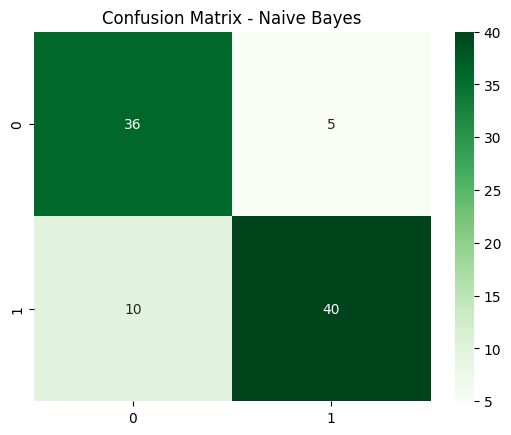

In [ ]:
print("Trần Khôi Nguyên_6351071049 - Câu 9: Mô hình Naive Bayes")

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("Accuracy NB:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, fmt='d', cmap="Greens")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


In [ ]:
print("Trần Khôi Nguyên_6351071049 - Câu 10: So sánh các mô hình")

print("Accuracy ID3 :", accuracy_score(y_test, y_pred_id3))
print("Accuracy CART:", accuracy_score(y_test, y_pred_cart))
print("Accuracy NB  :", accuracy_score(y_test, y_pred_nb))

print("""
Nhận xét:
- CART thường cho accuracy tốt và ổn định nhất.
- ID3 dùng entropy nên đôi khi overfit.
- Naive Bayes chạy nhanh nhất nhưng độ chính xác thường thấp hơn.
""")


Trần Khôi Nguyên_6351071049 - Câu 10: So sánh các mô hình
Accuracy ID3 : 0.7032967032967034
Accuracy CART: 0.7362637362637363
Accuracy NB  : 0.8351648351648352

Nhận xét:
- CART thường cho accuracy tốt và ổn định nhất.
- ID3 dùng entropy nên đôi khi overfit.
- Naive Bayes chạy nhanh nhất nhưng độ chính xác thường thấp hơn.

